In [16]:
import os
!pip install seaborn   ## install seaborn package 
import seaborn as sns  ## import seaborn package
import matplotlib.pyplot as plt ## import matplotlib package
# Set the working directory
os.chdir('/Users/giorgiocavallo/Desktop/Python/coursera/IBM_data_analysis')

# Get and print the new current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")  ## f is used to format the string


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Current working directory: /Users/giorgiocavallo/Desktop/Python/coursera/IBM_data_analysis


In [17]:
## read the csv data
import pandas as pd
df = pd.read_csv('automobile.csv')
print(df.head())
     

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [18]:
## descriptive statistics of the data: descfribe() method
df.describe()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [19]:
# Get the count of unique values in the 'drive-wheels' column of the DataFrame 'df'
drive_wheels_counts = df['drive-wheels'].value_counts() 

# Set the name of the series values to 'value_counts'
drive_wheels_counts.name = 'value_counts' 

# Name the index of the series as 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels' 

# Print the series which includes counts with unique drive-wheels as the index
print(drive_wheels_counts)


drive-wheels
fwd    120
rwd     76
4wd      9
Name: value_counts, dtype: int64


/var/folders/fc/_r3lb3_56kb1z0x8blszpvrm0000gn/T/ipykernel_1849/2263193345.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drive-wheels', y='price', data=df, palette='pastel') ## boxplot of price vs drive-wheels (different color)


<Axes: xlabel='drive-wheels', ylabel='price'>

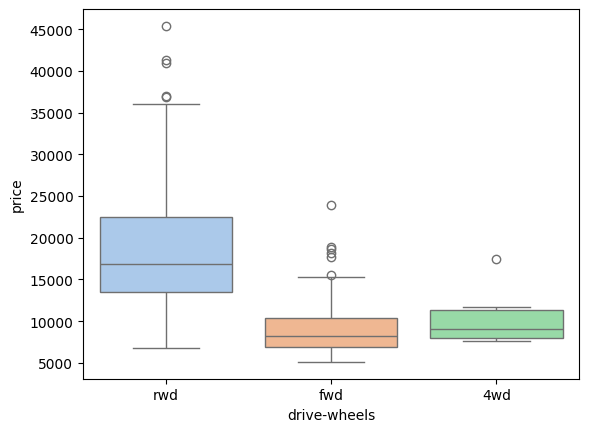

In [20]:
sns.boxplot(x='drive-wheels', y='price', data=df, palette='pastel') ## boxplot of price vs drive-wheels (different color)


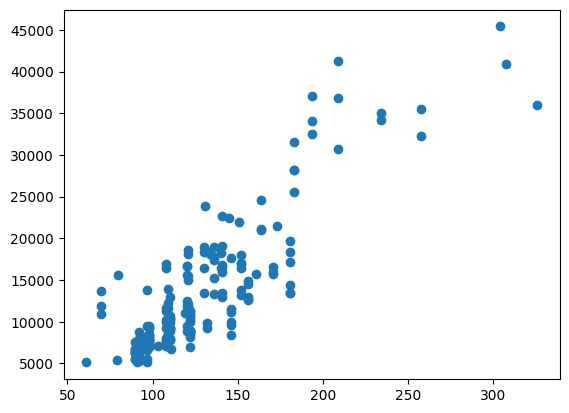

In [21]:
## scatter plot of engine-size vs price
y = df['price']
x = df['engine-size']
plt.scatter(x,y)

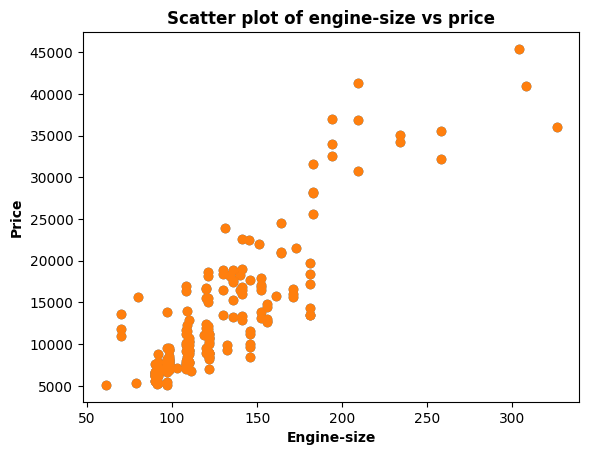

In [22]:
# Set the title of the plot
plt.title('Scatter plot of engine-size vs price')
# Label the x-axis
plt.xlabel('Engine-size')
# Label the y-axis
plt.ylabel('Price')
# Create a scatter plot using x and y coordinates
plt.scatter(x, y)

# Now update the plot labels to use a bold font

# Update the plot title with a bold font
plt.title('Scatter plot of engine-size vs price', fontweight='bold')
# Update the x-axis label with a bold font
plt.xlabel('Engine-size', fontweight='bold')
# Update the y-axis label with a bold font
plt.ylabel('Price', fontweight='bold')
# Create the scatter plot again with the bold settings (if necessary for refresh)
plt.scatter(x, y)

## GroupBy in Python

In [23]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_test
print(df_test)
## group by drive-wheels and body-style and calculate the mean of price for each group
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean() 
df_grp

## as_index=False means that the grouped columns are not set as index   



    drive-wheels   body-style    price
0            rwd  convertible  13495.0
1            rwd  convertible  16500.0
2            rwd    hatchback  16500.0
3            fwd        sedan  13950.0
4            4wd        sedan  17450.0
..           ...          ...      ...
200          rwd        sedan  16845.0
201          rwd        sedan  19045.0
202          rwd        sedan  21485.0
203          rwd        sedan  22470.0
204          rwd        sedan  22625.0

[205 rows x 3 columns]


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


## Pandas method: Pivot()

In [24]:

df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style') ## create a pivot table
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Heatmap
 

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')
Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')


/var/folders/fc/_r3lb3_56kb1z0x8blszpvrm0000gn/T/ipykernel_1849/1133905619.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


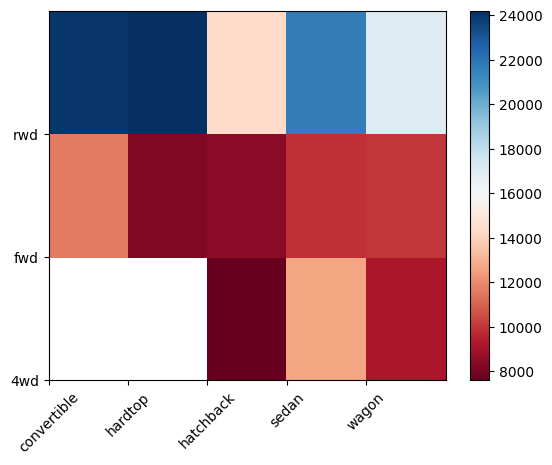

In [25]:
# Create a pseudocolor plot of the pivot table 'df_pivot' using the 'RdBu' colormap
plt.pcolor(df_pivot, cmap='RdBu')  

# Add a colorbar to the plot to indicate the mapping from data values to colors
plt.colorbar()  

# Extract the second level of column labels from 'df_pivot' and assign them to 'row_labels'
row_labels = df_pivot.columns.levels[1]  

# Assign the DataFrame index to 'col_labels'
col_labels = df_pivot.index  

# Print the row labels to the console for verification
print(row_labels)  

# Print the column labels to the console for verification
print(col_labels)  

# Set the x-axis ticks using the range of indices corresponding to the row labels,
# assign the row labels as tick labels, and rotate them 45 degrees for better readability
plt.xticks(range(len(row_labels)), row_labels, rotation=45)  

# Set the y-axis ticks using the range of indices corresponding to the column labels and assign the column labels as tick labels
plt.yticks(range(len(col_labels)), col_labels)  

# Render and display the final plot with the specified customizations
plt.show()

## Correlation

(0.0, 53207.369808371215)

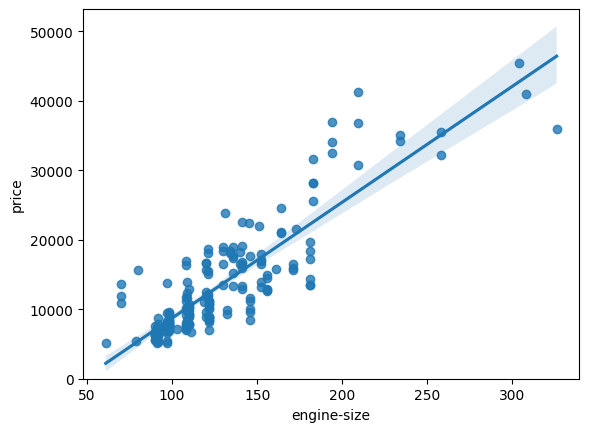

In [26]:
## correlation between engine-size and price
sns.regplot(x= 'engine-size', y='price', data=df)
plt.ylim(0, ) ## set the y-axis limits  to 0 and the maximum value of price in the data

(0.0, 48189.070108684595)

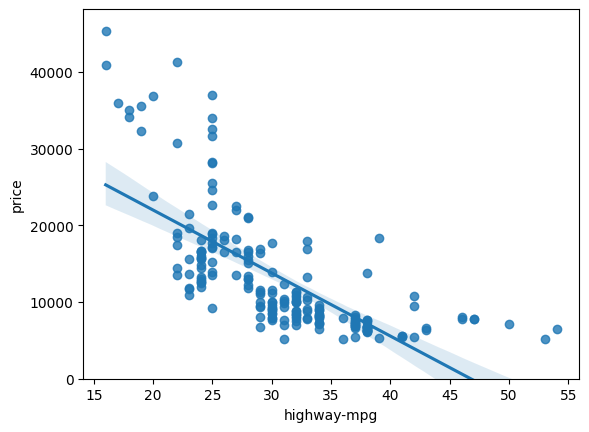

In [27]:
sns.regplot(x= 'highway-mpg', y='price', data=df)
plt.ylim(0, ) ## set the y-axis limits  to 0 and the maximum value of price in the data

(0.0, 47414.1)

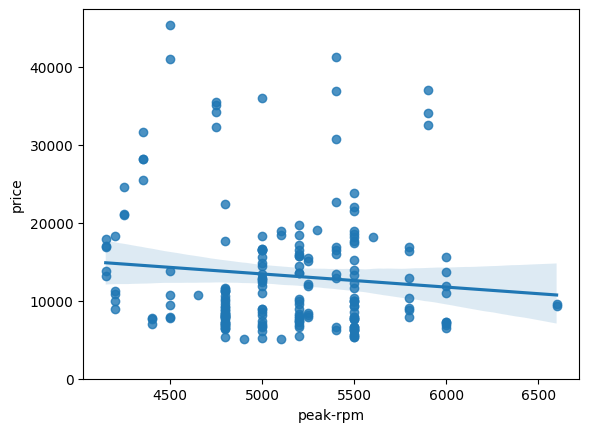

In [28]:
sns.regplot(x= 'peak-rpm', y='price', data=df)
plt.ylim(0, ) ## set the y-axis limits  to 0 and the maximum value of price in the data

In [ ]:
%pip install scipy
from scipy import stats

## drop missing values
df_cleaned = df[['horsepower', 'price']].dropna()
print(df_cleaned.head())

## Calculate the Pearson correlation coefficient and the p-value
pearson_coef, p_value = stats.pearsonr(df_cleaned['horsepower'], df_cleaned['price'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of P = {p_value}")

## A small p-value does not indicate a strong correlation, only that the correlation is statistically significant
## The Pearson Correlation Coefficient is close to 1, indicating a strong positive relationship between the two variables   



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   horsepower    price
0       111.0  13495.0
1       111.0  16500.0
2       154.0  16500.0
3       102.0  13950.0
4       115.0  17450.0
The Pearson Correlation Coefficient is 0.8105330821322062 with a P-value of P = 1.1891278276945975e-47


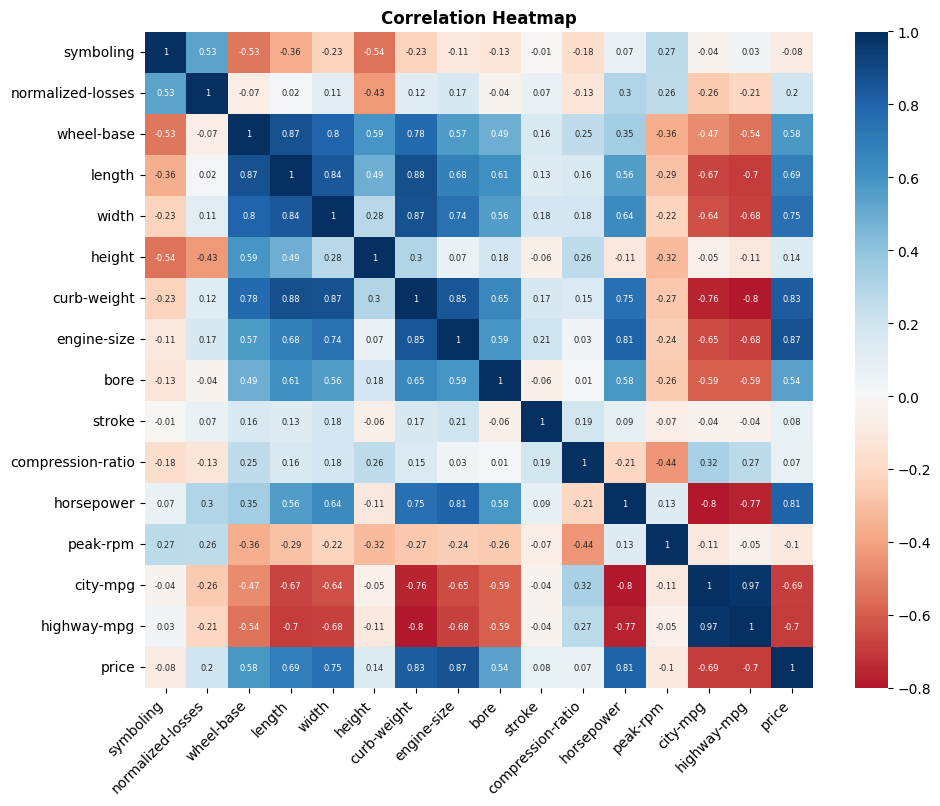

In [ ]:
# Import necessary libraries
import seaborn as sns     # for creating the heatmap
import matplotlib.pyplot as plt   # for customizing and displaying the plot

## correlation heatmap of the data with price
df.head()

#Set the figure size to provide more space for the labels
plt.figure(figsize=(10, 8))

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix from the numeric DataFrame
heatmap_data = numeric_df.corr().round(2)

# Create a heatmap with the correlation data
sns.heatmap(heatmap_data,      # Data for the heatmap
            annot=True,        # Annotate cells with the correlation values
            cmap='RdBu',       # Red-blue diverging colormap
            center=0,          # Center the colormap at 0
            annot_kws= {'fontsize': 6})          # Set font size for the annotations


# Customize the appearance of the heatmap
plt.xticks(rotation=45, ha='right')  # Rotate the column labels by 45 degrees
plt.tight_layout()       # Adjust the layout to make room for the rotated labels    


# Add a title to the heatmap
plt.title("Correlation Heatmap", fontweight='bold')

# Display the heatmap
plt.show()


